# Composing Music with xLSTM.

This notebook shows you how to compose music with xLSTM

On top of the installation instructions from the README, you might want to install the following packages:

In [ ]:
# Please uncomments. This is for the first time setup
# !pip install note-seq
# !pip install --upgrade bokeh==2.4.3

## Load the language model.

We will use this model: https://huggingface.co/TristanBehrens/jsfakes-music-xlstm/tree/main

In [1]:
import sys
sys.path.append("..")
from source.languagemodel import LanguageModel
import note_seq

# Select a model to load.
#model_path_or_repo = "TristanBehrens/jsfakes-music-transformer"
#model_path_or_repo = "TristanBehrens/jsfakes-music-pharia"
#model_path_or_repo = "TristanBehrens/jsfakes-music-mamba"
#model_path_or_repo = "TristanBehrens/jsfakes-music-xlstm"
#model_path_or_repo = "TristanBehrens/bach-garland-transformer"
# model_path_or_repo = "TristanBehrens/bach-garland-pharia"
#model_path_or_repo = "TristanBehrens/bach-garland-mamba"
#model_path_or_repo = "TristanBehrens/bach-garland-xlstm"
#model_path_or_repo = "TristanBehrens/bach-garland-mambaplus"
model_path_or_repo = "../output/jsfakes_garland_xlstm/run_20251224-0354"


# Load the model.
model = LanguageModel(
    model_path_or_repo,
    config_overrides={"context_length": 16_384},
)
model.summary()

/home/e20fyptemp1/miniconda3/envs/xlstm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   ▄█    █▄       ▄████████  ▄█        ▄█  ▀█████████▄     ▄████████ ███    █▄  ███▄▄▄▄   ███▄▄▄▄      ▄████████ 
  ███    ███     ███    ███ ███       ███    ███    ███   ███    ███ ███    ███ ███▀▀▀██▄ ███▀▀▀██▄   ███    ███ 
  ███    ███     ███    █▀  ███       ███▌   ███    ███   ███    ███ ███    ███ ███   ███ ███   ███   ███    ███ 
 ▄███▄▄▄▄███▄▄  ▄███▄▄▄     ███       ███▌  ▄███▄▄▄██▀   ▄███▄▄▄▄██▀ ███    ███ ███   ███ ███   ███   ███    ███ 
▀▀███▀▀▀▀███▀  ▀▀███▀▀▀     ███       ███▌ ▀▀███▀▀▀██▄  ▀▀███▀▀▀▀▀   ███    ███ ███   ███ ███   ███ ▀███████████ 
  ███    ███     ███    █▄  ███       ███    ███    ██▄ ▀███████████ ███    ███ ███   ███ ███   ███   ███    ███ 
  ███    ███     ███    ███ ███▌    ▄ ███    ███    ███   ███    ███ ███    ███ ███   ███ ███   ███   ███    ███ 
  ███    █▀      ██████████ █████▄▄██ █▀   ▄█████████▀    ███    ███ ████████▀   ▀█   █▀   ▀█   █▀    ███    █▀  
                            ▀                             ███    ███                    

Using /home/e20fyptemp1/.cache/torch_extensions/py311_cu121 as PyTorch extensions root...
Detected CUDA files, patching ldflags
Emitting ninja build file /home/e20fyptemp1/.cache/torch_extensions/py311_cu121/slstm_HS64BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0/build.ninja...
/home/e20fyptemp1/miniconda3/envs/xlstm/lib/python3.11/site-packages/torch/utils/cpp_extension.py:1965: UserWarning: TORCH_CUDA_ARCH_LIST is not set, all archs for visible cards are included for compilation. 
If this is not desired, please set os.environ['TORCH_CUDA_ARCH_LIST'].
  warnings.warn(
Building extension module slstm_HS64BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
Allowing ninja to set a default number of workers... (overridable by setting the environment variable MAX_JOBS=N)
Loading extension module slstm_HS64BS8NH4NS4DBfDRbDWbDGbDSbDAfNG4SA1GRCV0GRC0d0FCV0FC0d0...
/home/e20fyptemp1/miniconda3/envs/xlstm/lib/python3.11/site-packages/xlstm/blocks/slstm/cell.py:543: FutureWarning: `

ninja: no work to do.


/home/e20fyptemp1/miniconda3/envs/xlstm/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:2165: FutureWarning: Calling PreTrainedTokenizerFast.from_pretrained() with the path to a single file or url is deprecated and won't be possible anymore in v5. Use a model identifier or the path to a directory instead.
  warnings.warn(


xLSTMLMModel(
  (xlstm_block_stack): xLSTMBlockStack(
    (blocks): ModuleList(
      (0-1): 2 x mLSTMBlock(
        (xlstm_norm): LayerNorm()
        (xlstm): mLSTMLayer(
          (proj_up): Linear(in_features=64, out_features=256, bias=False)
          (q_proj): LinearHeadwiseExpand(in_features=128, num_heads=32, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (k_proj): LinearHeadwiseExpand(in_features=128, num_heads=32, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (v_proj): LinearHeadwiseExpand(in_features=128, num_heads=32, expand_factor_up=1, bias=False, trainable_weight=True, trainable_bias=True, )
          (conv1d): CausalConv1d(
            (conv): Conv1d(128, 128, kernel_size=(4,), stride=(1,), padding=(3,), groups=128)
          )
          (conv_act_fn): SiLU()
          (mlstm_cell): mLSTMCell(
            (igate): Linear(in_features=384, out_features=4, bias=True)
            (fgate): Line

/home/e20fyptemp1/miniconda3/envs/xlstm/lib/python3.11/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


## Utility code for music

Here is some code that will map anything that the model generates into a music representation that is close to GM MIDI.

In [2]:
import copy

def handle_garland_tokens(tokens):
    song_data = {}

    song_data["tracks"] = []

    current_track_index = 0
    current_timestep = 0
    for token in tokens:
        if token == "GARLAND_START":
            pass
        elif token == "BAR_START":
            if current_track_index == len(song_data["tracks"]):
                song_data["tracks"] += [{"bars": [], "instrument": "0"}]
            bar_data = {"notes": []}
            song_data["tracks"][current_track_index]["bars"] += [bar_data]
            current_timestep = 0
        elif token.startswith("INST="):
            instrument = token.split("=")[1]
            song_data["tracks"][current_track_index]["instrument"] = instrument
        elif token.startswith("DENSITY="):
            pass
        elif token.startswith("NOTE_ON="):
            note_pitch = int(token.split("=")[1])
            note_data = {
                "note": note_pitch,
                "start": current_timestep,
                "end": current_timestep,
                "veloctiy": 80
            }
            song_data["tracks"][current_track_index]["bars"][-1]["notes"] += [note_data]
            pass
        elif token.startswith("TIME_DELTA="):
            current_timestep += int(token.split("=")[1])
        elif token.startswith("NOTE_OFF="):
            note_pitch = int(token.split("=")[1])
            for note_data in song_data["tracks"][current_track_index]["bars"][-1]["notes"]:
                if note_data["note"] == note_pitch and note_data["start"] == note_data["end"]:
                    note_data["end"] = current_timestep
                    break
            pass
        elif token == "BAR_END":
            current_track_index += 1
        elif token == "NEXT":
            current_track_index = 0
        elif token == "GARLAND_END":
            pass
        elif token == "[PAD]":
            pass
        elif token == "[EOS]":
            pass
        else:
            raise Exception(f"Unknown token: {token}")
    
    assert isinstance(song_data, dict)
    return song_data

def convert_songdata_to_notesequence(song_data:dict, quantize_steps_per_quarter=8, remove_disabled_tracks=True):

    assert isinstance(song_data, dict), f"Invalid song data type: {type(song_data)}"

    # Clone the song data.
    song_data = copy.deepcopy(song_data)

    # Sort the tracks by instrument.
    assert "tracks" in song_data, f"Invalid song data: {song_data.keys()}"
    tracks = sorted(song_data["tracks"], key=lambda t: t["instrument"])
    song_data["tracks"] = tracks

    # Remove tracks that are not enabled.
    if remove_disabled_tracks:
        song_data["tracks"] = [t for t in song_data["tracks"] if t.get("enabled", True)]

    # Create an empy note sequence.
    note_sequence = note_seq.protobuf.music_pb2.NoteSequence()

    # Add the tempo.
    bpm = song_data["bpm"] if "bpm" in song_data else 120
    note_sequence.tempos.add().qpm = bpm

    # Compute some lengths.
    step_length_seconds = 60.0 / bpm / quantize_steps_per_quarter
    bar_length_seconds = 4 * step_length_seconds * quantize_steps_per_quarter

    # Get the instruments.
    instruments = list(set([t["instrument"] for t in song_data["tracks"]]))

    # Add the tracks.
    for track_index, track_data in enumerate(song_data["tracks"]):
        instrument = track_data["instrument"]
        for bar_index, bar_data in enumerate(track_data["bars"]):
            bar_start_time = bar_index * bar_length_seconds
            for note_data in bar_data["notes"]:
                assert "note" in note_data
                assert "start" in note_data
                assert "end" in note_data
                note = note_sequence.notes.add()
                #note.instrument = instrument TODO
                note.pitch = note_data["note"]
                note.start_time = note_data["start"] * step_length_seconds + bar_start_time
                note.end_time = note_data["end"] * step_length_seconds + bar_start_time
                if "velocity" in note_data:
                    note.velocity = note_data["velocity"]
                else:
                    note.velocity = 80
                note.instrument = track_index
                if instrument == "drums":
                    note.is_drum = True
                else:
                    note.is_drum = False
                    note.program = int(instrument)

    return note_sequence

## Generate music

In [ ]:
# The temperature of the generation. The higher the temperature, the more random the output.
temperature = 0.5

# The maximum length of the generated music.
max_length = 16_384

# When to stop the generation.
end_tokens = ["NEXT"]

# Compose the music iteratively bar by bar.
# output = "GARLAND_START"
output = "GARLAND_START BAR_START DENSITY=2 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 BAR_END"
for iteration in range(20):
    output_dict = model.generate(
        prompt=output,
        temperature=temperature,
        max_length=max_length,
        end_tokens=end_tokens,
        forbidden_tokens=["[PAD]", "[EOS]", "GARLAND_END"],
        return_structured_output=True
    )
    for key, value in output_dict.items():
        print(key, value)
    output = output_dict["output"]
    length = len(output.split(" "))
    print(f"Iteration {iteration}, length {length:_}")
    if length >= max_length:
        break

output GARLAND_START BAR_START DENSITY=2 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 NOTE_ON=60 TIME_DELTA=8 NOTE_OFF=60 BAR_END BAR_START DENSITY=4 NOTE_ON=53 TIME_DELTA=4 NOTE_OFF=53 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=50 TIME_DELTA=4 NOTE_OFF=50 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=53 TIME_DELTA=8 NOTE_OFF=53 NOTE_ON=53 TIME_DELTA=8 NOTE_OFF=53 BAR_END BAR_START DENSITY=4 NOTE_ON=41 TIME_DELTA=8 NOTE_OFF=41 NOTE_ON=41 TIME_DELTA=4 NOTE_OFF=41 NOTE_ON=43 TIME_DELTA=4 NOTE_OFF=43 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=45 NOTE_ON=43 TIME_DELTA=4 NOTE_OFF=43 NOTE_ON=41 TIME_DELTA=4 NOTE_OFF=41 NOTE_ON=43 TIME_DELTA=4 NOTE_OFF=43 BAR_END BAR_START DENSITY=2 NOTE_ON=69 TIME_DELTA=8 NOTE_OFF=69 NOTE_ON=67 TIME_DELTA=8 NOTE_OFF=67 NOTE_ON=69 TIME_DELTA=8 NOTE_OFF=69 NOTE_ON=69 TIME_DELTA=8 NOTE_OFF=69 BAR_END NEXT
elapsed_time 0.008715629577636719
tokens_per_second 114.73640442061495
Iteration 0, length 77
output GARLA

In [ ]:
tokens = output.split()
song_data = handle_garland_tokens(tokens)
note_sequence = convert_songdata_to_notesequence(song_data)

# note_seq.plot_sequence(note_sequence)
note_seq.play_sequence(note_sequence)

In [33]:
# Listen to music from dataset

dataset_example = "GARLAND_START BAR_START DENSITY=3 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END BAR_START DENSITY=4 NOTE_ON=52 TIME_DELTA=8 NOTE_OFF=52 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=51 TIME_DELTA=4 NOTE_OFF=51 NOTE_ON=49 TIME_DELTA=4 NOTE_OFF=49 NOTE_ON=47 TIME_DELTA=4 NOTE_OFF=47 NOTE_ON=45 TIME_DELTA=8 NOTE_OFF=45 BAR_END BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=3 NOTE_ON=56 TIME_DELTA=4 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=4 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=61 TIME_DELTA=8 NOTE_OFF=61 NOTE_ON=61 TIME_DELTA=8 NOTE_OFF=61 BAR_END NEXT BAR_START DENSITY=0 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 NOTE_ON=59 TIME_DELTA=24 NOTE_OFF=59 BAR_END BAR_START DENSITY=0 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 NOTE_ON=40 TIME_DELTA=24 NOTE_OFF=40 BAR_END BAR_START DENSITY=0 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=64 TIME_DELTA=24 NOTE_OFF=64 BAR_END BAR_START DENSITY=0 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=56 TIME_DELTA=24 NOTE_OFF=56 BAR_END NEXT BAR_START DENSITY=3 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 BAR_END BAR_START DENSITY=2 NOTE_ON=40 TIME_DELTA=8 NOTE_OFF=40 NOTE_ON=39 TIME_DELTA=8 NOTE_OFF=39 NOTE_ON=40 TIME_DELTA=8 NOTE_OFF=40 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 BAR_END BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=2 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 NOTE_ON=52 TIME_DELTA=8 NOTE_OFF=52 NOTE_ON=51 TIME_DELTA=8 NOTE_OFF=51 BAR_END NEXT BAR_START DENSITY=4 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=63 TIME_DELTA=4 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END BAR_START DENSITY=4 NOTE_ON=49 TIME_DELTA=4 NOTE_OFF=49 NOTE_ON=47 TIME_DELTA=4 NOTE_OFF=47 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=45 NOTE_ON=44 TIME_DELTA=4 NOTE_OFF=44 NOTE_ON=42 TIME_DELTA=8 NOTE_OFF=42 NOTE_ON=49 TIME_DELTA=8 NOTE_OFF=49 BAR_END BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 BAR_END BAR_START DENSITY=4 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=51 TIME_DELTA=4 NOTE_OFF=51 NOTE_ON=49 TIME_DELTA=4 NOTE_OFF=49 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=57 TIME_DELTA=8 NOTE_OFF=57 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 BAR_END NEXT BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 BAR_END BAR_START DENSITY=4 NOTE_ON=49 TIME_DELTA=8 NOTE_OFF=49 NOTE_ON=47 TIME_DELTA=4 NOTE_OFF=47 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=45 NOTE_ON=44 TIME_DELTA=4 NOTE_OFF=44 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=45 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 BAR_END BAR_START DENSITY=2 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=69 TIME_DELTA=8 NOTE_OFF=69 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=2 NOTE_ON=61 TIME_DELTA=8 NOTE_OFF=61 NOTE_ON=61 TIME_DELTA=8 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=12 NOTE_OFF=59 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 BAR_END NEXT BAR_START DENSITY=3 NOTE_ON=63 TIME_DELTA=4 NOTE_OFF=63 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 BAR_END BAR_START DENSITY=3 NOTE_ON=49 TIME_DELTA=8 NOTE_OFF=49 NOTE_ON=44 TIME_DELTA=4 NOTE_OFF=44 NOTE_ON=45 TIME_DELTA=4 NOTE_OFF=45 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 NOTE_ON=40 TIME_DELTA=8 NOTE_OFF=40 BAR_END BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END BAR_START DENSITY=2 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 BAR_END NEXT BAR_START DENSITY=4 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=64 TIME_DELTA=4 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=4 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=4 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=4 NOTE_OFF=66 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END BAR_START DENSITY=4 NOTE_ON=52 TIME_DELTA=4 NOTE_OFF=52 NOTE_ON=54 TIME_DELTA=4 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=4 NOTE_OFF=56 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 BAR_END BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 BAR_END BAR_START DENSITY=4 NOTE_ON=56 TIME_DELTA=4 NOTE_OFF=56 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END NEXT BAR_START DENSITY=3 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=4 NOTE_OFF=63 NOTE_ON=64 TIME_DELTA=4 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 BAR_END BAR_START DENSITY=4 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=54 TIME_DELTA=4 NOTE_OFF=54 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=47 TIME_DELTA=4 NOTE_OFF=47 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 BAR_END BAR_START DENSITY=0 NOTE_ON=66 TIME_DELTA=16 NOTE_OFF=66 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=4 NOTE_ON=61 TIME_DELTA=4 NOTE_OFF=61 NOTE_ON=57 TIME_DELTA=4 NOTE_OFF=57 NOTE_ON=54 TIME_DELTA=4 NOTE_OFF=54 NOTE_ON=59 TIME_DELTA=2 NOTE_OFF=59 NOTE_ON=54 TIME_DELTA=2 NOTE_OFF=54 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 BAR_END NEXT BAR_START DENSITY=2 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 BAR_END BAR_START DENSITY=3 NOTE_ON=52 TIME_DELTA=8 NOTE_OFF=52 NOTE_ON=51 TIME_DELTA=8 NOTE_OFF=51 NOTE_ON=49 TIME_DELTA=4 NOTE_OFF=49 NOTE_ON=47 TIME_DELTA=4 NOTE_OFF=47 NOTE_ON=46 TIME_DELTA=8 NOTE_OFF=46 BAR_END BAR_START DENSITY=2 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=73 TIME_DELTA=8 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=8 NOTE_OFF=73 BAR_END BAR_START DENSITY=2 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 BAR_END NEXT BAR_START DENSITY=2 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=65 TIME_DELTA=8 NOTE_OFF=65 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=0 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 NOTE_ON=49 TIME_DELTA=16 NOTE_OFF=49 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 BAR_END BAR_START DENSITY=0 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=68 TIME_DELTA=16 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 BAR_END BAR_START DENSITY=2 NOTE_ON=62 TIME_DELTA=8 NOTE_OFF=62 NOTE_ON=61 TIME_DELTA=12 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=4 NOTE_OFF=59 NOTE_ON=57 TIME_DELTA=8 NOTE_OFF=57 BAR_END NEXT BAR_START DENSITY=4 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=66 TIME_DELTA=4 NOTE_OFF=66 NOTE_ON=64 TIME_DELTA=8 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=2 NOTE_OFF=63 NOTE_ON=65 TIME_DELTA=2 NOTE_OFF=65 NOTE_ON=66 TIME_DELTA=4 NOTE_OFF=66 NOTE_ON=64 TIME_DELTA=4 NOTE_OFF=64 BAR_END BAR_START DENSITY=2 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=8 NOTE_OFF=56 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 BAR_END BAR_START DENSITY=2 NOTE_ON=73 TIME_DELTA=8 NOTE_OFF=73 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=66 TIME_DELTA=8 NOTE_OFF=66 NOTE_ON=69 TIME_DELTA=8 NOTE_OFF=69 BAR_END BAR_START DENSITY=2 NOTE_ON=57 TIME_DELTA=8 NOTE_OFF=57 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=59 TIME_DELTA=8 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=8 NOTE_OFF=61 BAR_END NEXT BAR_START DENSITY=3 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 NOTE_ON=68 TIME_DELTA=8 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=4 NOTE_OFF=66 NOTE_ON=64 TIME_DELTA=4 NOTE_OFF=64 NOTE_ON=63 TIME_DELTA=8 NOTE_OFF=63 BAR_END BAR_START DENSITY=3 NOTE_ON=56 TIME_DELTA=4 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=4 NOTE_OFF=54 NOTE_ON=52 TIME_DELTA=8 NOTE_OFF=52 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 NOTE_ON=47 TIME_DELTA=8 NOTE_OFF=47 BAR_END BAR_START DENSITY=2 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 NOTE_ON=73 TIME_DELTA=8 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=8 NOTE_OFF=73 NOTE_ON=71 TIME_DELTA=8 NOTE_OFF=71 BAR_END BAR_START DENSITY=0 NOTE_ON=59 TIME_DELTA=16 NOTE_OFF=59 NOTE_ON=58 TIME_DELTA=8 NOTE_OFF=58 NOTE_ON=54 TIME_DELTA=8 NOTE_OFF=54 BAR_END GARLAND_END"

ds_ex_tokens = dataset_example.split()
ds_song_data = handle_garland_tokens(ds_ex_tokens)
ds_note_sequence = convert_songdata_to_notesequence(ds_song_data)

# note_seq.plot_sequence(note_sequence)
note_seq.play_sequence(ds_note_sequence)

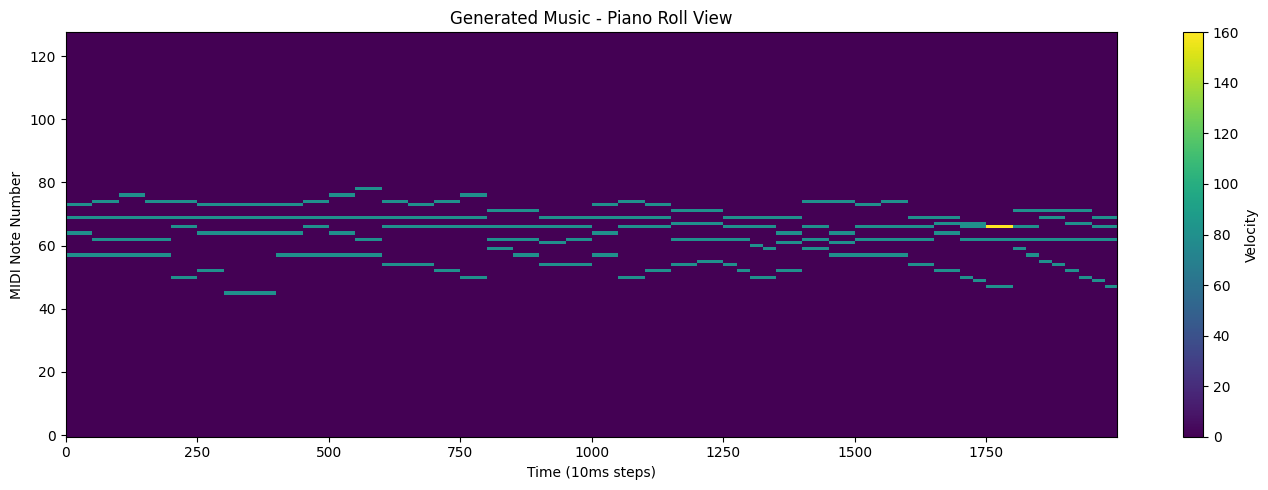

In [9]:
# Visualize with matplotlib (instead of bokeh)
import matplotlib.pyplot as plt
import pretty_midi

# Save to MIDI temporarily
note_seq.sequence_proto_to_midi_file(note_sequence, 'temp.mid')
midi_data = pretty_midi.PrettyMIDI('temp.mid')

# Plot piano roll
plt.figure(figsize=(14, 5))
piano_roll = midi_data.get_piano_roll(fs=100)
plt.imshow(piano_roll, aspect='auto', origin='lower', cmap='viridis', interpolation='nearest')
plt.xlabel('Time (10ms steps)')
plt.ylabel('MIDI Note Number')
plt.title('Generated Music - Piano Roll View')
plt.colorbar(label='Velocity')
plt.tight_layout()
plt.show()

34543